<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Алгоритмы кластеризации (практика)</center></h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [4]:
## Your Code Here
df = pd.read_csv('food.txt',sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [5]:
X = df.iloc[:,1:].values
X_train = (X-X.mean(axis = 0))/X.std(axis=0)
X_train

array([[ 1.33505901,  0.23968064,  1.31429714, -0.45658134,  0.1523851 ],
       [ 0.37851533,  0.47936128,  0.31851589, -0.45658134,  0.22212065],
       [ 2.14056947, -0.95872255,  2.31007839, -0.48269934, -0.26602823],
       [ 1.68746984,  0.        ,  1.67639941, -0.45658134,  0.1523851 ],
       [-0.27596192,  0.71904192, -0.31516309, -0.35210934,  0.9194762 ],
       [-0.93043917,  0.23968064, -0.94884207, -0.46964034, -0.68444155],
       [-0.37665073,  1.43808383, -0.58673979, -0.41740434, -0.614706  ],
       [-0.47733953,  1.67776447, -0.76779093, -0.39128634,  2.45365839],
       [ 0.57989295,  0.23968064,  0.59009259, -0.45658134,  0.1523851 ],
       [ 0.93230378, -0.23968064,  1.04272043, -0.45658134, -0.05682156],
       [ 1.33505901,  0.23968064,  1.31429714, -0.45658134,  0.08264955],
       [ 1.33505901,  0.        ,  1.40482271, -0.45658134,  0.08264955],
       [ 1.48609222,  0.        ,  1.49534827, -0.45658134,  0.01291399],
       [-0.0242399 , -0.23968064,  0.0

In [10]:
X_train.mean(axis=0)

array([ -9.45745539e-17,   0.00000000e+00,   6.57909941e-17,
         3.70074342e-17,   1.38777878e-16])

In [11]:
from scipy.cluster.hierarchy import dendrogram,  fcluster, linkage

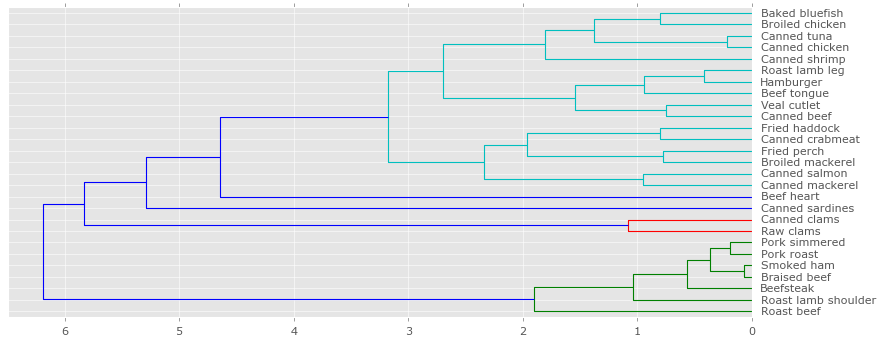

In [14]:
Z = linkage(X_train, method='complete')
dml = dendrogram(Z, labels=df.loc[:, 'Name'].values, orientation='left')

In [17]:
labels = fcluster(Z, 4,criterion='distance')
labels

array([1, 3, 1, 1, 3, 3, 3, 4, 3, 1, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 5, 3, 3])

In [20]:
df.loc[:, 'label'] = labels
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,labels,label
0,Braised beef,340,20,28,9,2.6,1,1
1,Hamburger,245,21,17,9,2.7,3,3
2,Roast beef,420,15,39,7,2.0,1,1
3,Beefsteak,375,19,32,9,2.6,1,1
4,Canned beef,180,22,10,17,3.7,3,3


In [22]:
df.groupby('label').agg('mean')

,Energy,Protein,Fat,Calcium,Iron,labels
label,,,,,,
1,352.857143,18.571429,30.142857,8.714286,2.414286,1
2,57.500000,9.000000,1.000000,78.000000,5.700000,2
3,167.187500,19.812500,8.562500,36.812500,1.725000,3
4,160.000000,26.000000,5.000000,14.000000,5.900000,4
5,180.000000,22.000000,9.000000,367.000000,2.500000,5


In [23]:
for label, group in df.groupby('label'):
    print 'Cluster label = {}'.format(label)
    print '='*10

    print group

Cluster label = 1
                   Name  Energy  Protein  Fat  Calcium  Iron  labels  label
0          Braised beef     340       20   28        9   2.6       1      1
2            Roast beef     420       15   39        7   2.0       1      1
3             Beefsteak     375       19   32        9   2.6       1      1
9   Roast lamb shoulder     300       18   25        9   2.3       1      1
10           Smoked ham     340       20   28        9   2.5       1      1
11           Pork roast     340       19   29        9   2.5       1      1
12        Pork simmered     355       19   30        9   2.4       1      1
Cluster label = 2
            Name  Energy  Protein  Fat  Calcium  Iron  labels  label
16     Raw clams      70       11    1       82   6.0       2      2
17  Canned clams      45        7    1       74   5.4       2      2
Cluster label = 3
                Name  Energy  Protein  Fat  Calcium  Iron  labels  label
1          Hamburger     245       21   17        9   2.7 

# Европейcкие языки

Загризите данные из файла `'languages.txt'` о произношении различных слов на европейских языках.

Используйте расстояние Левенштейна, чтобы рассчитать близость языков по данным словам

Для этого вам надо написать собственную функцию, которая принимает на вход вектора двух объектов и считает расстояние между ними.

Как в дальнейшем использовать вашу функцию можно посмотреть [здесь](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) в п.23 (если вы будете использовать `scipy`)  или передать на вход в `AgglomerativeClustering` в `sklearn`.

In [ ]:
def classic_levenshtein(string_1, string_2):
    '''
    Расстояние Левенштейна
    '''
    len_1 = len(string_1)
    len_2 = len(string_2)
    cost = 0

    if len_1 and len_2 and string_1[0] != string_2[0]:
        cost = 1

    if len_1 == 0:
        return len_2
    elif len_2 == 0:
        return len_1
    else:
        return min(
            classic_levenshtein(string_1[1:], string_2) + 1,
            classic_levenshtein(string_1, string_2[1:]) + 1,
            classic_levenshtein(string_1[1:], string_2[1:]) + cost,
)

In [ ]:
classic_levenshtein('мгу', 'вмк')

In [1]:
## Your Code Here
import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [4]:
df_geo = pd.read_csv('geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

IOError: File geo_data.txt does not exist